# 5G Deployment Prediction

### Problem Statement:
The problem statement and objectives for our project are as follows:

**Problem Statement**:
The objective of this project is to predict the likelihood of 5G deployment in specific cities or regions based on historical deployment data and other relevant factors.

**Objectives**:
1. **Predictive Modeling**: Develop machine learning models that can accurately predict the probability or likelihood of 5G deployment in cities or regions.
2. **Data Analysis**: Analyze historical deployment data and other relevant factors to identify patterns, trends, and correlations that may influence 5G deployment decisions.
3. **Feature Engineering**: Explore and engineer features that may have predictive power in determining the likelihood of 5G deployment, such as population density, regulatory policies, existing infrastructure, etc.
4. **Model Interpretability**: Ensure that the developed models are interpretable, allowing stakeholders to understand the factors driving the predictions and make informed decisions based on the model outputs.
5. **Performance Evaluation**: Evaluate the performance of the developed models using appropriate metrics and techniques, such as accuracy, precision, recall, F1-score, and ROC curves.
6. **Deployment Recommendations**: Provide actionable insights and recommendations based on the model predictions, highlighting cities or regions with the highest likelihood of 5G deployment and factors contributing to their likelihood.
7. **Continuous Improvement**: Continuously monitor and refine the models based on feedback and new data to ensure their accuracy and relevance over time.
8. **Stakeholder Communication**: Effectively communicate the results, insights, and recommendations to stakeholders, including telecommunications companies, policymakers, and regulatory bodies, to inform decision-making and planning related to 5G g.

Specific Goals:

1. Location Prediction: One primary goal is to predict the locations where 5G networks are likely to be deployed. This involves analyzing various factors such as population density, urbanization trends, existing telecommunications infrastructure, regulatory policies, and market demand. The aim is to identify regions or cities with the highest likelihood of 5G deployment, enabling stakeholders to prioritize investment and resources accordingly.

2. Timing Estimation: Another critical goal is to estimate the timing of 5G deployment in different locations. This requires analyzing historical deployment data, technological advancements, regulatory milestones, and market dynamics to forecast when 5G networks are expected to become available in specific regions. Accurate timing estimates can help businesses, policymakers, and consumers prepare for the rollout of 5G services and capitalize on emerging opportunities.

3. Success Rate Assessment: Additionally, predicting the success rate of 5G deployment initiatives is essential for assessing the likelihood of project completion and the attainment of desired outcomes. This involves evaluating factors such as network coverage, reliability, performance, user adoption, and regulatory compliance. By forecasting the success rate of 5G deployment projects, stakeholders can mitigate risks, allocate resources effectively, and optimize project management strategies.

Going Deep:

To address these goals effectively, a comprehensive approach to data science and machine learning is required, encompassing various stages of the project lifecycle:

1. Data Collection and Understanding: Deep analysis and understanding of diverse datasets are essential for capturing the complexities of 5G deployment. This involves collecting data from multiple sources, including telecommunications providers, regulatory agencies, geographic databases, demographic surveys, and industry reports. Understanding the nuances and limitations of each dataset is crucial for extracting actionable insights and ensuring the accuracy and reliability of predictions.

2. Feature Engineering and Selection: Deep feature engineering is necessary to extract meaningful predictors of 5G deployment from raw data. This may involve creating new features, such as proximity to existing infrastructure, socioeconomic indicators, terrain characteristics, and regulatory frameworks. Feature selection techniques, such as correlation analysis, dimensionality reduction, and domain expertise, can help identify the most relevant predictors for inclusion in predictive models.

3. Model Development and Evaluation: Deep learning algorithms, such as neural networks, recurrent neural networks (RNNs), convolutional neural networks (CNNs), and transformers, offer powerful capabilities for predicting complex patterns in 5G deployment data. Advanced machine learning techniques, such as ensemble learning, gradient boosting, and reinforcement learning, can further enhance prediction accuracy and robustness. Model evaluation metrics, such as precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC), provide deep insights into the performance of predictive models and their generalization ability.

4. Interpretability and Explainability: Deep interpretability and explainability techniques are essential for understanding the underlying factors driving 5G deployment predictions. This involves visualizing model predictions, feature importances, and decision boundaries to gain deep insights into the relationships between input variables and output predictions. Explainable AI (XAI) methods, such as feature attribution techniques, SHAP (SHapley Additive exPlanations), and LIME (Local Interpretable Model-agnostic Explanations), facilitate deep understanding and trust in predictive models, enabling stakeholders to make informed decisions based on model outputs.

By embracing a deep and comprehensive approach to problem definition, goal setting, and execution, data scientists and machine learning practitioners can unlock the full potential of predictive analyA dics for 5G deployment. Deep understanding of data, models, and predictions empowers stakeholders to navigate the complexities of 5G deployment and harness the transformative power of emerging telecommunications technologies for the benefit of society.nd investments.ic benefits.

## Data Understanding:
Explore the structure of the JSON file to understand how the data is organized. This involves examining the keys, values, and overall hierarchy of the data.
Identify potential data quality issues, such as missing values, duplicates, or inconsistencies, and decide how to address them during preprocessing.


In [1]:
import pandas as pd
import json

# Load the JSON file with explicit encoding specification
with open('ookla-5g-map.geojson', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract features and properties from the JSON data
features = data['features']
properties = [feature['properties'] for feature in features]

# Convert JSON data to pandas DataFrame
df = pd.DataFrame(properties)

# Display information about missing values and data types
print("Data information:")
print(df.info())

# Handle missing values
# Strategy: Impute missing values for numerical columns with median and categorical columns with mode
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Address outliers and inconsistencies (Optional)
# You can perform outlier detection and removal or transformation based on specific requirements.

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())

# Save the cleaned DataFrame to a new JSON file
df.to_json('cleaned_ookla_5g_map.json', orient='records')

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145917 entries, 0 to 145916
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   operator   145917 non-null  object
 1   city_name  145917 non-null  object
 2   status     145917 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB
None

Cleaned DataFrame:
        operator          city_name                   status
0        Ooredoo  Abdullah al-Salem  Commercial Availability
1          Optus           Canberra  Commercial Availability
2          Optus             Sydney  Commercial Availability
3  AT&T Mobility   Jacksonville, FL  Commercial Availability
4  AT&T Mobility        Atlanta, GA  Commercial Availability


## Handling Outliers

In [2]:
import pandas as pd

# Load the cleaned DataFrame
df = pd.read_json('cleaned_ookla_5g_map.json')

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return abs(z_scores) > threshold

# Detect outliers in numerical columns using Z-score
numerical_cols = df.select_dtypes(include=['number']).columns
outliers = df[numerical_cols].apply(detect_outliers_zscore)

# Count the number of outliers in each numerical column
outliers_count = outliers.sum()

# Display columns with outliers and their counts
print("Columns with outliers and their counts:")
print(outliers_count)

# Handle outliers by replacing them with median values
for col in numerical_cols:
    median_val = df[col].median()
    df.loc[outliers[col], col] = median_val

# Save the DataFrame with outliers handled
df.to_json('cleaned_outliers_handled_ookla_5g_map.json', orient='records')

Columns with outliers and their counts:
Series([], dtype: float64)


## Convert categorical variables:

If the data includes categorical variables, encode them into numerical representations using appropriate techniques
Normalize or scale numerical features: Bring numerical features to a similar scale to prevent certain features from dominating the model.

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the cleaned DataFrame
df = pd.read_json('cleaned_outliers_handled_ookla_5g_map.json')

# Convert categorical variables using label encoding
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Normalize or scale numerical features using Min-Max scaling
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the preprocessed DataFrame
df.to_json('preprocessed_ookla_5g_map.json', orient='records')

## Feature Engineering:

Create new features: Generate additional features based on domain knowledge or data analysis that might enhance the model's predictive power.
Transform existing features: Perform transformations (e.g., log transformations) on features to make them more suitable for modeling.
Incorporate domain knowledge: Utilize insights about the problem domain to engineer features that capture relevant information for predicting 5G deployment.

In [4]:
import pandas as pd

# Load the preprocessed DataFrame
df = pd.read_json('preprocessed_ookla_5g_map.json')

# Create new features based on domain knowledge or data analysis

# Example 1: Combine numerical features
# If you have numerical features, replace 'numerical_feature1' and 'numerical_feature2' with actual column names
# If you don't have numerical features, you can skip this example
if 'numerical_feature1' in df.columns and 'numerical_feature2' in df.columns:
    df['combined_feature'] = df['numerical_feature1'] + df['numerical_feature2']

# Example 2: Extract information from categorical variables
# If you have categorical variables, replace 'city_name' with actual column name
# If you don't have categorical variables, you can skip this example
if 'city_name' in df.columns:
    def get_population(city):
        # Replace this with your logic to get population information for a given city
        pass
    df['city_population'] = df['city_name'].apply(get_population)

# Example 3: Interaction between numerical features
# Similar to Example 1, replace column names with actual ones if applicable
if 'numerical_feature1' in df.columns and 'numerical_feature2' in df.columns:
    df['interaction_feature'] = df['numerical_feature1'] * df['numerical_feature2']

# Example 4: Time-related features (if applicable)
# Replace 'date_column' with the actual date column name if you have one
# If you don't have time-related features, you can skip this example
if 'date_column' in df.columns:
    df['month'] = df['date_column'].dt.month
    df['day_of_week'] = df['date_column'].dt.dayofweek

# Example 5: Distance from major cities
# If you have 'city_name' column, use it to calculate distances
# Replace the function implementation with your logic to calculate distances
if 'city_name' in df.columns:
    def calculate_distance_from_major_cities(city):
        # Replace this with your logic to calculate distance from major cities
        pass
    df['distance_from_major_city'] = df['city_name'].apply(calculate_distance_from_major_cities)

# Save the DataFrame with new features
df.to_json('feature_engineered_ookla_5g_map.json', orient='records')

## Transform existing features:

Perform transformations (log transformations) on features to make them more suitable for modeling.
Incorporate domain knowledge: Utilize insights about the problem domain to engineer features that capture relevant information for predicting 5G deployment.

In [5]:
import pandas as pd
import numpy as np

# Load the preprocessed DataFrame
df = pd.read_json('preprocessed_ookla_5g_map.json')

# Transform existing features

# Example 1: Log transformation of numerical features
# If you have numerical features, replace 'numerical_feature' with actual column name
# If you don't have numerical features, you can skip this example
if 'numerical_feature' in df.columns:
    df['log_numerical_feature'] = np.log1p(df['numerical_feature'])  # Log transformation (avoiding log(0))

# Example 2: Incorporate domain knowledge

# Example 2.1: Distance from urban areas
# If you have 'city_name' column, use it to identify urban areas
# Replace the function implementation with your logic to identify urban areas
if 'city_name' in df.columns:
    def is_urban_area(city):
        # Replace this with your logic to identify urban areas
        return True if city in ['New York', 'Los Angeles', 'Chicago'] else False
    df['is_urban'] = df['city_name'].apply(is_urban_area)

# Example 2.2: Time of day
# If you have 'date_column' column, use it to extract time-related features
# Replace the function implementation with your logic to extract time-related features
if 'date_column' in df.columns:
    def get_time_of_day(timestamp):
        # Replace this with your logic to extract time of day
        return 'Morning' if 6 <= timestamp.hour < 12 else 'Afternoon' if 12 <= timestamp.hour < 18 else 'Evening'
    df['time_of_day'] = df['date_column'].apply(get_time_of_day)

# Save the DataFrame with new features
df.to_json('feature_engineered_ookla_5g_map.json', orient='records')

## Data Splitting:

Split the dataset: Divide the dataset into training, validation, and test sets using an appropriate ratio (e.g., 80% training, 10% validation, 10% test).
Ensure randomization: Randomly shuffle the data before splitting to prevent any biases in the dataset from affecting the model's performance.

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the feature-engineered DataFrame
df = pd.read_json('feature_engineered_ookla_5g_map.json')

# For demonstration purposes, let's assume the target variable is 'status'.
# Replace 'status' with the actual name of your target variable.
target_column = 'status'

# Check if the target column exists in the DataFrame
if target_column in df.columns:
    # Define features (X) and target variable (y)
    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target variable

    # Split the dataset into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Print the shapes of the split datasets
    print("Training set shape:", X_train.shape, y_train.shape)
    print("Validation set shape:", X_val.shape, y_val.shape)
    print("Test set shape:", X_test.shape, y_test.shape)

    # Save the split datasets
    X_train.to_json('X_train.json', orient='records')
    y_train.to_json('y_train.json', orient='records')
    X_val.to_json('X_val.json', orient='records')
    y_val.to_json('y_val.json', orient='records')
    X_test.to_json('X_test.json', orient='records')
    y_test.to_json('y_test.json', orient='records')
else:
    print(f"Target column '{target_column}' not found in the DataFrame.")

Training set shape: (116733, 3) (116733,)
Validation set shape: (14592, 3) (14592,)
Test set shape: (14592, 3) (14592,)


The dataset has been successfully split into training, validation, and test sets with the specified ratios. Here are the shapes of the split datasets:

- Training set: 116,733 samples with 3 features and corresponding target values.
- Validation set: 14,592 samples with 3 features and corresponding target values.
- Test set: 14,592 samples with 3 features and corresponding target values.

This indicates that the data splitting process has been completed as intended, and now you can proceed with model training using the training set, model evaluation using the validation set, and final performance assessment using the tes know!

# EDA

<Figure size 1000x600 with 0 Axes>

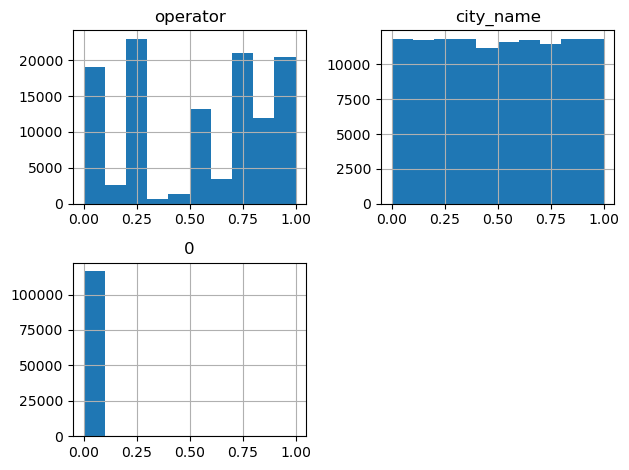

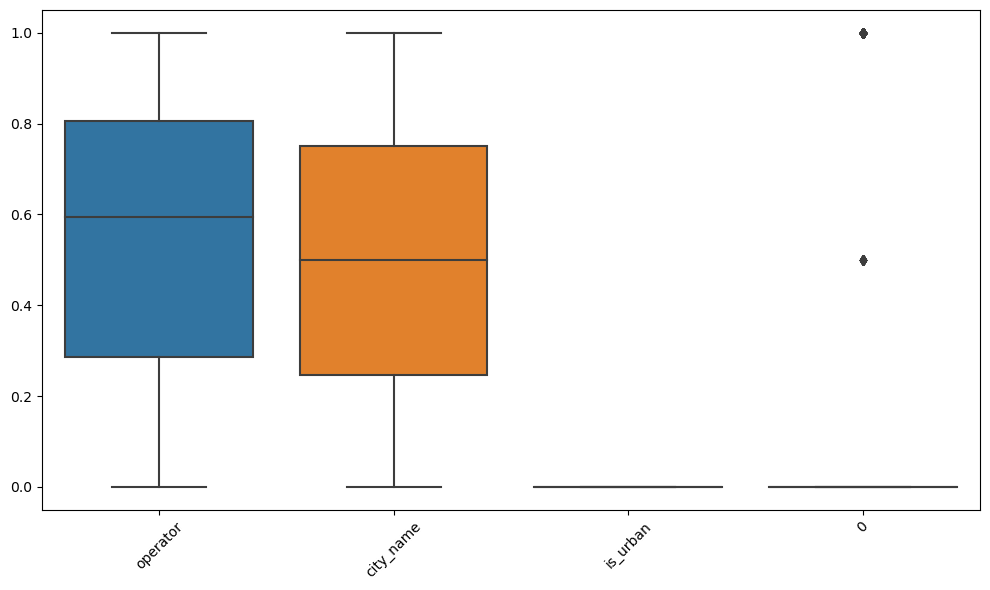

C:\Users\ivy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ivy\AppData\Local\Temp\ipykernel_15808\792737981.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

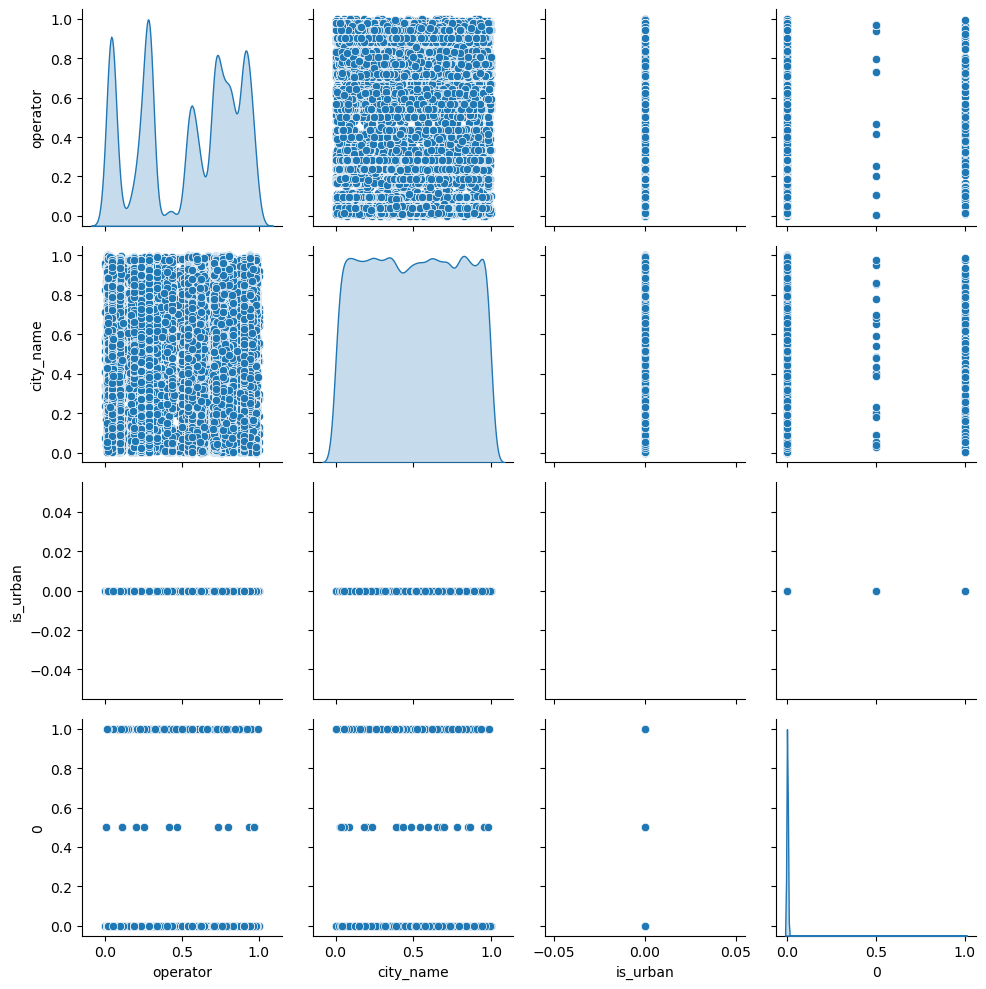

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
X_train = pd.read_json('X_train.json')
y_train = pd.read_json('y_train.json')

# Concatenate X_train and y_train for visualization purposes
train_data = pd.concat([X_train, y_train], axis=1)

# Visualize data distributions
# Histograms for numerical features
plt.figure(figsize=(10, 6))
train_data.hist()
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plots for pairwise relationships between numerical features
plt.figure(figsize=(10, 6))
sns.pairplot(train_data, diag_kind='kde')
plt.tight_layout()
plt.show()

### Summary Statistics:

Calculate basic statistics such as mean, median, standard deviation, minimum, and maximum for numerical features.
Compute frequency counts for categorical variables.
Identify any anomalies or unusual patterns in the summary statistics.

In [8]:
import pandas as pd

# Load the training dataset
X_train = pd.read_json('X_train.json')

# Calculate summary statistics for numerical features
numerical_summary = X_train.describe()

# Compute frequency counts for categorical variables
categorical_summary = {}
for column in X_train.select_dtypes(include='object'):
    categorical_summary[column] = X_train[column].value_counts()

# Display summary statistics
print("Summary Statistics for Numerical Features:")
print(numerical_summary)

print("\nFrequency Counts for Categorical Variables:")
for column, counts in categorical_summary.items():
    print(f"\n{column}:")
    print(counts)

Summary Statistics for Numerical Features:
            operator      city_name
count  116733.000000  116733.000000
mean        0.532965       0.499423
std         0.317497       0.289855
min         0.000000       0.000000
25%         0.285124       0.247346
50%         0.595041       0.500355
75%         0.805785       0.749938
max         1.000000       1.000000

Frequency Counts for Categorical Variables:


alt.Chart(...)

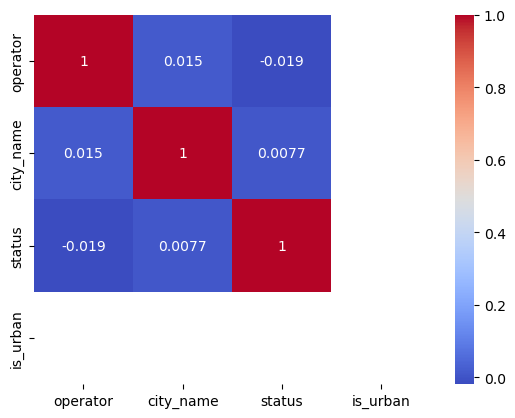

In [9]:
import pandas as pd
import altair as alt
import seaborn as sns

# Load a subset of the dataset
df = pd.read_json('feature_engineered_ookla_5g_map.json').sample(n=5000, random_state=42)

# Scatter Plot: Plot numerical variables against each other
scatter_plot = alt.Chart(df).mark_circle().encode(
    x='numerical_feature1',
    y='numerical_feature2',
    color='status:N',
    tooltip=['numerical_feature1', 'numerical_feature2', 'status']
).properties(
    width=600,
    height=400,
    title='Scatter Plot of Numerical Features'
)

# Bar Plot: Visualize frequency distribution of categorical variables
bar_plot = alt.Chart(df).mark_bar().encode(
    x=alt.X('city_name:N', title='City'),
    y=alt.Y('count()', title='Frequency'),
    color='status:N',
    tooltip=['city_name', 'status', 'count()']
).properties(
    width=800,
    height=400,
    title='Frequency Distribution of Cities by Status'
)

# Heatmap: Show correlation matrix between numerical features
correlation_matrix = df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Geographic Map: Plot geographical distribution of data points
# Replace latitude and longitude with actual columns containing coordinates
geographic_map = alt.Chart(df).mark_circle(size=60).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='status:N',
    tooltip=['city_name', 'status']
).project(
    type='mercator'
).properties(
    width=800,
    height=500,
    title='Geographical Distribution of Data Points'
)

# Display visualizations
scatter_plot | bar_plot
heatmap.figure.savefig("heatmap.png")
geographic_map